In [5]:
import pandas as pd
from unidecode import unidecode

1) Reprenez les commentaires extraits lors de la précédente séance

In [6]:
df=pd.read_csv('Scrap_Amazone (1).csv')
df

,Date,User,Fiabilite,Score,Texte
0,6 janvier 2019,DELORME,Verifie,1,"Franchement, je me suis arrêté au chapitre 1. ..."
1,15 novembre 2019,P. Greg,Verifie,4,"Lise Bourbeau, l'auteur de ces Cinq blessures ..."
2,25 février 2017,Karen Payet,Verifie,2,"Un peu déçue...Lise Bourbeau décrit les ""5 ble..."
3,12 juin 2018,CPE,Verifie,1,Un livre à l'américaine qui fait très secte ! ...
4,25 avril 2018,Mod S,Verifie,1,Le contenu de ce livre est complètement délira...
...,...,...,...,...,...
995,2 mars 2018,nabou61,Verifie,5,C mon livre de chevet. Sa perturbe le quotidie...
996,15 décembre 2020,d'ambra romain,Verifie,5,Top top
997,2 septembre 2019,bénédicte dewé,Verifie,5,permet une meilleure approche des autres et un...
998,11 janvier 2021,PEREZ Guillaume,Verifie,5,Très bon livre pour mieux se comprendreExcelle...


2) Macro nettoyage :
- Enlever les duplicats
- Filtre sur la longueur des comments (> 15 mots) (seuil à définir)
- Création d'un corpus positif (Score >3) et negatif (Score <3)


In [7]:
# Enlever les duplicats
len(df.drop_duplicates(subset=['Texte'])),len(df)
df.drop_duplicates(subset=['Texte'],inplace=True)

In [8]:
# Filtre sur la longueur des comments (> 15 mots) (seuil à définir)
# Premiere methode
long=[]
for elem in df['Texte']:
    long.append(len(elem.split(' ')))
df['longueur_texte']=long
df

,Date,User,Fiabilite,Score,Texte,longueur_texte
0,6 janvier 2019,DELORME,Verifie,1,"Franchement, je me suis arrêté au chapitre 1. ...",188
1,15 novembre 2019,P. Greg,Verifie,4,"Lise Bourbeau, l'auteur de ces Cinq blessures ...",248
2,25 février 2017,Karen Payet,Verifie,2,"Un peu déçue...Lise Bourbeau décrit les ""5 ble...",58
3,12 juin 2018,CPE,Verifie,1,Un livre à l'américaine qui fait très secte ! ...,29
4,25 avril 2018,Mod S,Verifie,1,Le contenu de ce livre est complètement délira...,20
...,...,...,...,...,...,...
995,2 mars 2018,nabou61,Verifie,5,C mon livre de chevet. Sa perturbe le quotidie...,56
996,15 décembre 2020,d'ambra romain,Verifie,5,Top top,2
997,2 septembre 2019,bénédicte dewé,Verifie,5,permet une meilleure approche des autres et un...,18
998,11 janvier 2021,PEREZ Guillaume,Verifie,5,Très bon livre pour mieux se comprendreExcelle...,8


In [9]:
# Filtre sur la longueur des comments (> 15 mots) (seuil à définir)
# Deuxieme methode

df['longueur_texte']=df['Texte'].apply(lambda x: len(x.split(' ')))
df

,Date,User,Fiabilite,Score,Texte,longueur_texte
0,6 janvier 2019,DELORME,Verifie,1,"Franchement, je me suis arrêté au chapitre 1. ...",188
1,15 novembre 2019,P. Greg,Verifie,4,"Lise Bourbeau, l'auteur de ces Cinq blessures ...",248
2,25 février 2017,Karen Payet,Verifie,2,"Un peu déçue...Lise Bourbeau décrit les ""5 ble...",58
3,12 juin 2018,CPE,Verifie,1,Un livre à l'américaine qui fait très secte ! ...,29
4,25 avril 2018,Mod S,Verifie,1,Le contenu de ce livre est complètement délira...,20
...,...,...,...,...,...,...
995,2 mars 2018,nabou61,Verifie,5,C mon livre de chevet. Sa perturbe le quotidie...,56
996,15 décembre 2020,d'ambra romain,Verifie,5,Top top,2
997,2 septembre 2019,bénédicte dewé,Verifie,5,permet une meilleure approche des autres et un...,18
998,11 janvier 2021,PEREZ Guillaume,Verifie,5,Très bon livre pour mieux se comprendreExcelle...,8


In [14]:
# Filtre le Df pour ne conserver que les textes aynt un nb de mots sup à un seuil

seuil=15

df=df[df['longueur_texte'] > seuil]
df

,Date,User,Fiabilite,Score,Texte,longueur_texte
0,6 janvier 2019,DELORME,Verifie,1,"Franchement, je me suis arrêté au chapitre 1. ...",188
1,15 novembre 2019,P. Greg,Verifie,4,"Lise Bourbeau, l'auteur de ces Cinq blessures ...",248
2,25 février 2017,Karen Payet,Verifie,2,"Un peu déçue...Lise Bourbeau décrit les ""5 ble...",58
3,12 juin 2018,CPE,Verifie,1,Un livre à l'américaine qui fait très secte ! ...,29
4,25 avril 2018,Mod S,Verifie,1,Le contenu de ce livre est complètement délira...,20
...,...,...,...,...,...,...
982,31 janvier 2020,Bâ,Verifie,5,Je trouve ce livre tres instructif. Malgré qu’...,25
983,14 juin 2019,Lalla Celine,Verifie,5,A lire et relire sans modérationPenser à prend...,17
995,2 mars 2018,nabou61,Verifie,5,C mon livre de chevet. Sa perturbe le quotidie...,56
997,2 septembre 2019,bénédicte dewé,Verifie,5,permet une meilleure approche des autres et un...,18


In [15]:
df['Score'].value_counts()

5    381
4    152
1    113
3     88
2     47
Name: Score, dtype: int64

In [17]:
# Création d'un corpus positif (Score > 3) et negatif (Score < 3)
negatif=list(df[df['Score'] < 3]['Texte'])

positif=list(df[df['Score'] > 3]['Texte'])

3) Micro nettoyage
- Importer une liste de stopwords et normalisez la (accents, minuscules). Nous traitons des commentaires 
    - ==> plusieurs mots ecrit differemment ont la meme racine
    ex: fête, Fête, fete, Fete
- Fonction nettoyage (input : str // Output: str):  
	+ normaliser le texte (minuscule et accents)
	+ suppression des caracteres spéciaux (:!/.;+-56336...)
	+ test si chaque mot restant n'est pas un stopword
	+ retourne le texte nettoyé (chaque mot separé d'un expace)

==> Nettoyage des corpus positifs et negatifs

In [18]:
# Importer une liste de stopwords et normalisez la (accents, minuscule). Nous traitons des commentaires

with open('stop-w_fr.txt') as f:
    sw=unidecode(f.read().lower()).split('\n')
sw=sw+['ci',"re",'an','pr','it','ment','or','eme','su','dr','ere','mm','and','tt',"op",'nait','met']
sw.remove('bon')
sw.remove('bien')

FileNotFoundError: [Errno 2] No such file or directory: 'stop-w_fr.txt'

In [75]:
# Fonction nettoyage (input : str // Output: str)

def nettoyage(texte):
    # normaliser le texte (minuscule et accents)
    texte=unidecode(texte).lower()
    texte_f=''
    # suppression des caracteres spéciaux (:!/.;+-56336...)
    p='[a-z]{1,}'
    for word in re.findall(p,unidecode(texte).lower()):
        # test si chaque mot restant n'est pas un stopword
        if word in sw :
            continue
        else:
            texte_f=texte_f+' '+word
    # retourne le texte nettoyé (chaque mot separé d'un expace)
    return texte_f

nettoyage(positif[0])

' lise bourbeau auteur blessures empechent convictions polemiques reincarnation ames maladies causees blessures mentales ecriture moments pesante poussive pourtant livre appris apporte choses aide mieux comprendre fonctionnements propos simple existe blessures fondamentales souffrons rejet abandon humiliation trahison injustice realite faits definit blessure ressentie construction mentale souffrant humiliation sentira humiliee partenaire abandonne patron subir injustice eviter souffrir construisons masques blessures fuyant dependant masochiste controlant rigide portons fonction gravite blessures cas corps comportement marques schematiquement souffrant humiliation porte masque masochiste tendance habiller vetements avantagent tacher mangeant solution lise bourbeau comprendre blessures pardonner blesses voulu apprendre aimer retirer masques devenir livre suffise contribuer'

In [76]:
positif=[nettoyage(elem) for elem in positif]
negatif=[nettoyage(elem) for elem in negatif]

4) Wordcount : en utilisant notre fonction Word count, extraire la liste des mots les plus utilisés (ajustez ainsi votre liste de stop words)


In [77]:
def mot_unique(x):
    return list(set(x.split()))

def wc(x):
    # input : une chaine de caractere
    d={}
    for elem in mot_unique(x):
        d[elem]=x.count(elem)
    # Output dictionnaire
    return dict(sorted(d.items(), key=lambda item: item[1],reverse=True))

wc(' '.join(positif))

In [78]:
wc(' '.join(positif))

{'livre': 539,
 'prend': 283,
 'sure': 253,
 'blessure': 250,
 'prendre': 244,
 'blessures': 213,
 'comprend': 201,
 'comprendre': 190,
 'lire': 167,
 'age': 138,
 'port': 137,
 'air': 128,
 'commande': 124,
 'bien': 118,
 'recommande': 117,
 'lu': 114,
 'vie': 108,
 'mieux': 104,
 'porte': 103,
 'lis': 95,
 'interessant': 92,
 'aide': 87,
 'bon': 84,
 'connait': 82,
 'aime': 82,
 'lecture': 76,
 'vrai': 75,
 'naitre': 74,
 'connaitre': 72,
 'trouve': 70,
 'lise': 70,
 'chose': 66,
 'facile': 63,
 'conseil': 62,
 'sonne': 61,
 'gueri': 61,
 'auteur': 59,
 'don': 57,
 'personnel': 57,
 'comporte': 54,
 'lit': 54,
 'choses': 53,
 'ame': 53,
 'clair': 51,
 'comportement': 51,
 'fair': 49,
 'ecrit': 49,
 'faire': 48,
 'aiment': 48,
 'travail': 48,
 'conseille': 48,
 'mis': 46,
 'donne': 46,
 'vraiment': 45,
 'ouvrage': 45,
 'apprend': 45,
 'part': 45,
 'mettre': 44,
 'onde': 44,
 'bourbeau': 43,
 'voir': 42,
 'petit': 41,
 'psy': 41,
 'mme': 41,
 'apport': 41,
 'pris': 41,
 'lie': 40,
 'ma

5) En utilisant la librairie wordcloud dessiner la representation des mots les plus utilisés (negatifs puis positifs)


In [83]:
l=['sdfsf','fqf','fdfqfq','sffq']
' '.join(l)

'sdfsf fqf fdfqfq sffq'

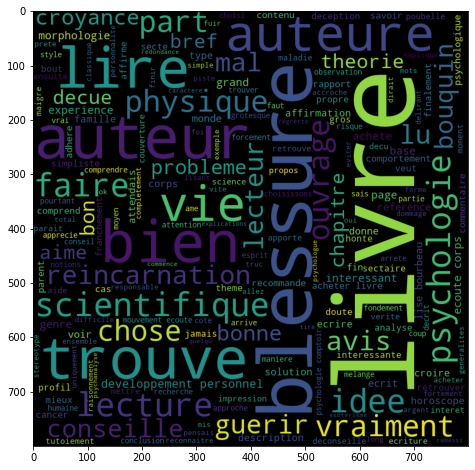

In [81]:
f=negatif

from os import path
from PIL import Image
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(prefer_horizontal=0.9,
                    width=800,
                    height=800,
                    ).generate(' '.join(f))
plt.figure(figsize= (8, 8), facecolor= None)
plt.imshow(wordcloud)

6) Comment ameliorer ?


==> Utiliser de n-grams

exemple 2-gram ==> Pour afficher des combinaisons de 2 mots successifs (voisins) dans un commentaire


7) Reprendre à la question 4) et utiliser le CountVectorizer de sklearn.feature_extraction.text 


Nous allons ajuster du contexte en modifiant un hyperparameter CountVectorizer(ngram_range=(2,3))



Il faudra créer une fonction qui prend les mots (combinaison de mots si ngrams) ayant une occurence > seuil et les collecte.


In [125]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(negatif)

print(vectorizer.get_feature_names())

['abandonne grand asthme', 'abandonne lecture seconde', 'abandonner livre blessure', 'abandonner traitement mouvement', 'abandonnes diabete guette', 'aberrations paragraphes triste', 'abime cense couverture', 'abject opinion cancer', 'aborde theme tome', 'abstraction partie parait', 'absurde faut croire', 'absurdes lire livre', 'absurdite nom faire', 'absurdites jamais occasion', 'abus psychotropes allez', 'abusives maine loire', 'acabit formations desireux', 'accables vie best', 'acceder paix promesse', 'acceptable demande inconsciemment', 'acceptation accepter responsable', 'acceptation audiolib these', 'acceptation livre chapitre', 'accepter responsable heureux', 'accord idee ecoute', 'accord idee faite', 'accordent credit voir', 'accroche auteure adresse', 'accroche fini revendre', 'accroche prefere etudes', 'accrocher livre avis', 'accumulation theories fumeuses', 'achat livre incoherent', 'achetais livre auteur', 'achete bouquins collection', 'achete ecrire article', 'achete essa

In [129]:
N=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

In [141]:
# Extraction par commentaire des meilleurs combiniaisons de mots (2/3 grams) selon leurs occurences 

# nombre de combinaisons par commentaire que je souhaite extraire
nb= 3
termes_pr=''
# Je balaie tous les commentaires
for i in N.index:
    count=nb
    tmp=N.loc[i]
    # Tant que je n'ai pas trois resultats par commentaires je continue à collecter les combis
    while count !=0 :
        # Je prends la colonne avec le meiller socre
        m=tmp.idxmax()
        # J'integre cette combinaison de mot dans ma chaine finale de resultats (touts les comments)
        termes_pr=termes_pr+' '+' '.join([m.replace(' ','_').strip()]*tmp[tmp.idxmax()])
        # J'efface le max du commentaire pour pouvoir rechercher le second max
        del tmp[m]
        # Je decremente la valeur de count puisque je viens d'ajouter une combinaise de mots
        count=count-1
    

termes_pr

' acceptable_demande_inconsciemment acceptation_accepter_responsable accepter_responsable_heureux arguments_tires_cheveux blessures_partir_physique bourbeau_decrit_blessures americaine_secte_croire auteure_copie_colle colle_texte_fin completement_delirant_vois contenu_livre_completement delirant_vois_commentaires affirme_auteure_descriptions auteure_descriptions_larges convaincue_affirme_auteure affirmations_grotesques_auteur affirmer_humiliees_surpoids auteur_affirmer_humiliees americain_ensuite_idee apparement_idees_blessures attribuer_physiques_problemes admettant_cible_blessures blessure_melange_prete blessures_mal_detaillees absurde_faut_croire aider_trouve_demoralisant aime_aiteur_decrit apprecie_lecture_livre decue_livre_recommande ensuite_piste_progresser ameliorer_relation_livres chapitres_litteralement_copiees cherchez_ameliorer_relation adore_probleme_estime ame_reincarnation_choisissons avancer_professionnellement_voulu abject_opinion_cancer algorithmes_niveau_chercher alze

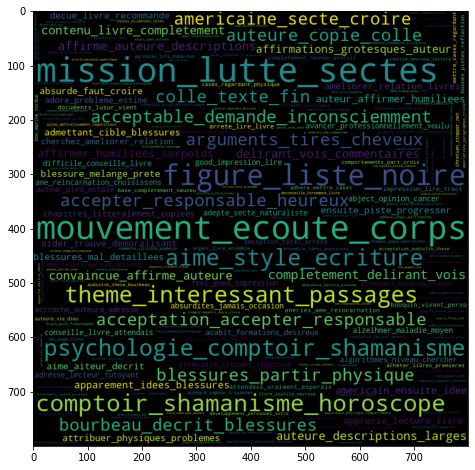

In [142]:


from os import path
from PIL import Image
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(prefer_horizontal=0.9,
                    width=800,
                    height=800,collocations=False
                    ).generate(termes_pr)
plt.figure(figsize= (8, 8), facecolor= None)
plt.imshow(wordcloud)